In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

games = pd.read_csv('filtered_games.csv')

games.dropna()


,Unnamed: 0,Peak CCU,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever
0,0,0,0,0,0,6,11,30,0,0,0
1,1,0,0,0,0,53,5,12,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,3,0,0,0,0,0
4,4,0,0,0,0,50,8,17,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71711,71711,0,0,0,0,0,0,6,0,0,0
71712,71712,6,0,0,0,9,1,83,0,0,0
71713,71713,0,0,0,0,1,0,3,0,0,0
71714,71714,0,0,0,0,0,0,0,0,0,0


In [3]:
x = games.drop(['Average playtime forever', 'Median playtime forever'], axis=1)
y = games['Average playtime forever']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=42)

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [4]:
y_pred = reg.predict(x_test)
y_pred

array([119.02880509,  88.49549324,  40.99987595, ..., 557.19431337,
        47.87354117,  52.01303341])

In [5]:
r2_score(y_test,y_pred)

0.03396221200681082

In [6]:
mean_absolute_error(y_test,y_pred)

174.75215270243095

In [7]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(x)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [8]:
model = LogisticRegression(random_state=42).fit(x_train,y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

c:\Users\benpt\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7943295375319545


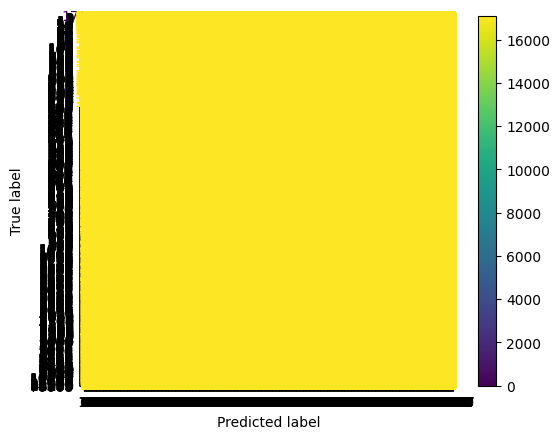

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)